In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
%matplotlib inline

ImportError: No module named artist

## Распределение Хи-квадрат

In [2]:
np.random.seed(42)

NameError: name 'np' is not defined

In [3]:
# Сгенерируем пример распределения Хи-квадрат с 5 степенями свободы
base_sample = np.random.chisquare(5, 1000)

Text(0.5,1,'Гистограмма и теоретическая кривая распределения Хи-квадрат с 5 степенями свободы')

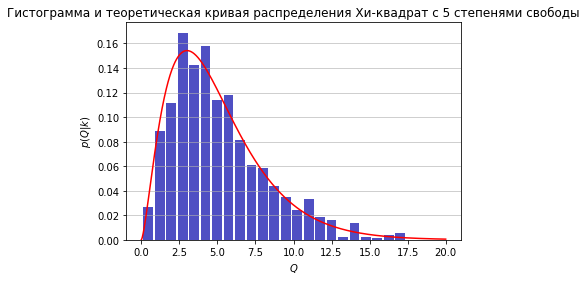

In [4]:
# Нарисуем гистограмму и теоретическую кривую распределения Хи-квадрат с 5 степенями свободы
n, bins, patches = plt.hist(base_sample, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85, density=True)
plt.grid(axis='y', alpha=0.75)
x = np.linspace(0, 20, 1000)
dist = scipy.stats.chi2(5, 0)
plt.plot(x, dist.pdf(x), c='red')
plt.xlabel('$Q$')
plt.ylabel(r'$p(Q|k)$')
plt.title('Гистограмма и теоретическая кривая распределения Хи-квадрат с 5 степенями свободы')

In [5]:
# Создаем 1000 выборок распределения Хи-квадрат с количеством степеней свободы 5 размером 5, 10 и 50 элементов
import numpy as np
samples5 = np.array([np.random.chisquare(5, 5) for i in range(1000)])
print samples5

samples10 = np.array([np.random.chisquare(5, 10) for i in range(1000)])
samples50 = np.array([np.random.chisquare(5, 50) for i in range(1000)])

[[ 3.60080848  4.14607785  6.12682139  3.15643158  2.30329688]
 [ 5.16556868  7.41270727  1.99008696  1.05106114  5.9293486 ]
 [ 1.22627775  4.4826851   3.40156037  7.95568523  1.60117782]
 ...
 [11.6883252   3.66820965  4.30815044  3.72575306  1.72621162]
 [ 8.53235307  4.7706672   1.47738257 12.96137982  1.55350637]
 [ 8.11613819  6.1385038   6.80729604  7.21126606  1.92790001]]


In [6]:
# Подсчитаем выборочные средние этих распределений
samples5_means = samples5.mean(axis=1)
samples10_means = samples10.mean(axis=1)
samples50_means = samples50.mean(axis=1)

In [7]:
# Рассчитаем аппроксимирующие распределения для наших выборок
# Теоретическое среднее для распределения Хи-квадрат с количеством степеней свободы k=5 равно k(т.е. 5), 
# а дисперсия - 2*k(т.е. 10). Для аппроксимирующих кривых среднее совпадает с теоретическим средним:
mu = 5
mean5 = mu
mean10 = mu
mean50 = mu
# а стандартное отклонение - теоретическому стандартному отклонению(т.е. квадратному корню из 2*k), 
# деленному на квадратный корень из n(количество элементов в выборке)
k=5
sigma5 = np.sqrt(2*k/5)
sigma10 = np.sqrt(2*k/10)
sigma50 = np.sqrt(2*k/50)

In [8]:
# Создадим функцию для рассчета элементов нормального распределения
def sigma_(x, mean, sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

Text(0.5,1,'Гистограмма выборочных средних для выборок с 5 элементами')

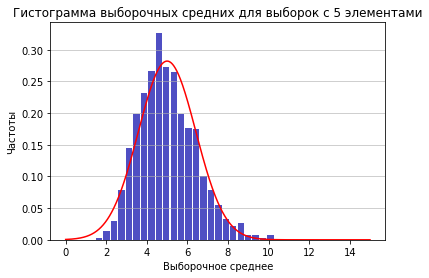

In [9]:
# Нарисуем гистограмму и теоретическую кривую распределения выборочных средних Хи-квадрат с 5 степенями свободы
# при выборках в 5 элементов
n, bins, patches = plt.hist(x=samples5_means, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85, density=True)
plt.grid(axis='y', alpha=0.75)
x = np.linspace(0, 15, 1000)
plt.plot(x, sigma_(x, mean5, sigma5), c='red')
plt.xlabel('Выборочное среднее')
plt.ylabel('Частоты')
plt.title('Гистограмма выборочных средних для выборок с 5 элементами')

Text(0.5,1,'Гистограмма выборочных средних для выборок с 5 элементами')

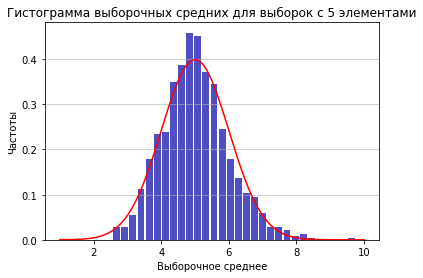

In [10]:
# Нарисуем гистограмму и теоретическую кривую распределения выборочных средних Хи-квадрат с 5 степенями свободы
# при выборках в 10 элементов
n, bins, patches = plt.hist(x=samples10_means, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85, density=True)
plt.grid(axis='y', alpha=0.75)
x = np.linspace(1, 10, 1000)
plt.plot(x, sigma_(x, mean10, sigma10), c='red')
plt.xlabel('Выборочное среднее')
plt.ylabel('Частоты')
plt.title('Гистограмма выборочных средних для выборок с 5 элементами')

Text(0.5,1,'Гистограмма выборочных средних для выборок с 5 элементами')

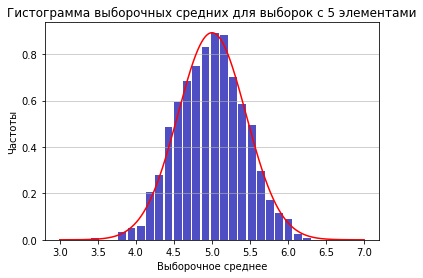

In [11]:
# Нарисуем гистограмму и теоретическую кривую распределения выборочных средних Хи-квадрат с 5 степенями свободы
# при выборках в 50 элементов
n, bins, patches = plt.hist(x=samples50_means, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85, density=True)
plt.grid(axis='y', alpha=0.75)
x = np.linspace(3, 7, 1000)
plt.plot(x, sigma_(x, mean50, sigma50), c='red')
plt.xlabel('Выборочное среднее')
plt.ylabel('Частоты')
plt.title('Гистограмма выборочных средних для выборок с 5 элементами')

### Выводы

* Распределение Хи-квадрат является явно скошенным, поэтому выборочное распределение при малом размере выборов также имеет скошенность.

* При размере выборок 50 скошенность перестает быть заметной.

* При выборках в 50 элементов гистограмма выборочного распределения лучше всего аппроксимирует теоретическое нормальное распределение